# Lecture 20: Chapter 10 Wavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 4 - Landau Section 10.4.2 #3: Wavelet inverse transform

## Exercise 1 – Landau Section 10.2.1: Wave Packet Exercise
- Plotting graphs to visualize may help.
- Can use dy/dt=0 to solve for tmax. Evaluate ymax = y(tmax). Then y1/2 = ½ ymax.

---

Consider the following wave packets:

$$y_1(t) = e^{-t^2 / 2},  \quad
y_2(t) = \sin(8t)e^{-t^2 / 2}, \quad 
y_3(t) = (1 - t^2)e^{-t^2 / 2}. \tag{10.10}
$$

For each wave packet:

1) Estimate the width $\Delta t$. A good measure might be the *full width at half-maxima* (FWHM) of $|y(t)|$.

2) Use your DFT program to evaluate and plot the Fourier transform $Y(\omega)$ for each wave packet.  
Make both a linear and a semilog plot (small components are often important, yet not evident in linear plots).  
Make sure that your transform has a good number of closely spaced frequency values over a range that is large enough to show the periodicity of $Y(\omega)$.

3) What are the units for $Y(\omega)$ and $\omega$ in your DFT?

4) For each wave packet, estimate the width $\Delta \omega$.  
A good measure might be the full width at half-maxima of $|Y(\omega)|$.

5) For each wave packet determine approximate value for the constant $C$ of the uncertainty principle:  
$$\Delta t \Delta \omega \geq 2\pi C. \tag{10.11}$$


In [2]:
def wavepackets(t):
    y1 = np.exp(-t **2 / 2)
    y2 = np.sin(8 * t) * y1
    y3 = (1 - t**2) * y1
    return y1, y2, y3

In [23]:
def estimate_fwhm(t, y):
    y_abs = np.abs(y)
    ymax = np.max(y_abs)
    y_half = ymax / 2

    above_half = y_abs >= y_half
    indices = np.where(np.diff(above_half.astype(int)) != 0)[0]

    if len(indices) >= 2:
        t1 = t[indices[0]]
        t2 = t[indices[-1] + 1]  # +1 to get the right-side index
        fwhm = t2 - t1
    else:
        fwhm = np.nan
        t1 = t2 = np.nan
    return fwhm, y_half

In [32]:
def plot_signal(t, y, label, show_fwhm=False, logscale=False, xlabel='t [s]', ylabel=None):
    y_abs = np.abs(y)
    plt.figure(figsize=(8, 4))

    if logscale:
        plt.semilogy(t, y_abs, label=f'$|{label}|$')
    else:
        plt.plot(t, y_abs, label=f'$|{label}|$')

    if show_fwhm:
        fwhm, y_half = estimate_fwhm(t, y)
        plt.axhline(y_half, color='gray', linestyle='--', label='Half max')
        plt.axvline(fwhm / 2, color='red', linestyle=':', label='FWHM')
        plt.title(f'{label}: FWHM ≈ {fwhm:.3f}')
    else:
        scale_tag = ' (Semilog)' if logscale else ''
        plt.title(f'{label}{scale_tag}')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel if ylabel else f'$|{label}|$' + (' (log scale)' if logscale else ''))
    plt.grid(True, which='both' if logscale else 'major')
    plt.legend()

    if r'$\omega' in xlabel:
        plt.xlim(-50, 50)

    plt.tight_layout()
    plt.show()


In [24]:
t = np.linspace(-5, 5, 1000)
y1, y2, y3 = wavepackets(t)

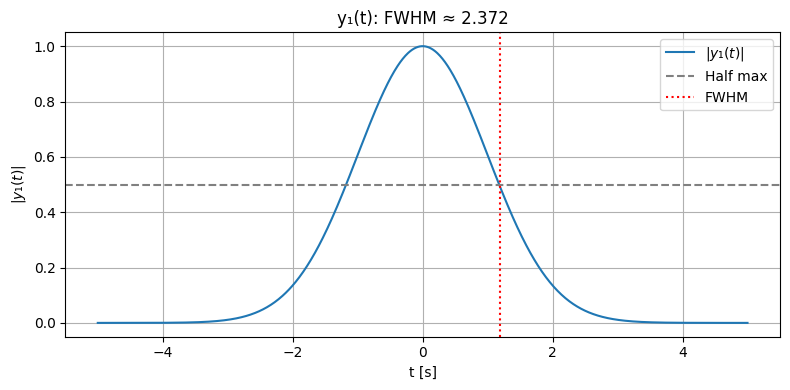

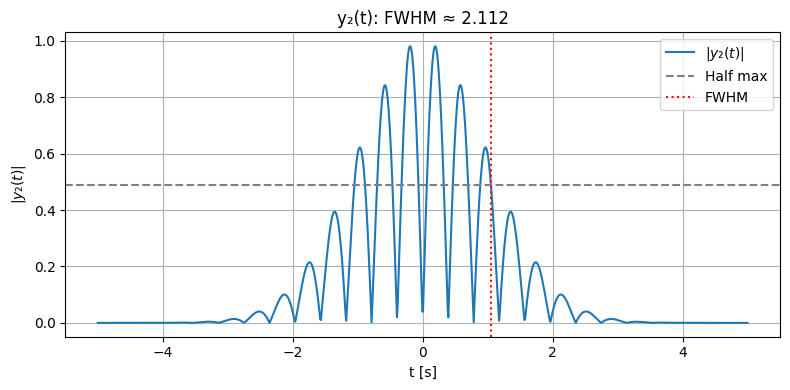

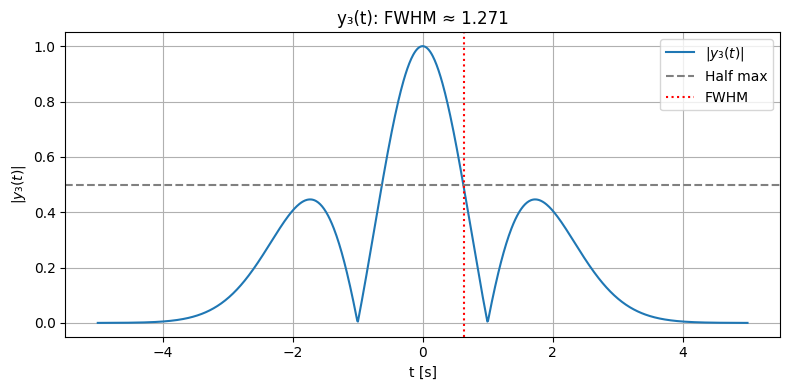

In [25]:
# Plot wave packets with FWHM
plot_signal(t, y1, 'y₁(t)', show_fwhm=True)
plot_signal(t, y2, 'y₂(t)', show_fwhm=True)
plot_signal(t, y3, 'y₃(t)', show_fwhm=True)

In [26]:
signals = [('y₁(t)', y1), ('y₂(t)', y2), ('y₃(t)', y3)]

# Loop through and find FWHMs
fwhm_results = {}

for label, y in signals:
    fwhm, y_half = estimate_fwhm(t, y)
    fwhm_results[label] = fwhm
    print(f"{label}: FWHM ≈ {fwhm:.5f} s")

y₁(t): FWHM ≈ 2.37237 s
y₂(t): FWHM ≈ 2.11211 s
y₃(t): FWHM ≈ 1.27127 s


In [27]:
def compute_fft(t, y):
    N = len(t)
    dt = t[1] - t[0]
    f = np.fft.fftfreq(N, d=dt)
    omega = 2 * np.pi * f
    omega_shifted = np.fft.fftshift(omega)

    Y = np.fft.fft(y)
    Y_mag = np.abs(np.fft.fftshift(Y))

    return omega_shifted, Y_mag

In [34]:
t = np.linspace(-10, 10, 4000)
y1, y2, y3 = wavepackets(t)

signals = [('y₁(t)', y1), ('y₂(t)', y2), ('y₃(t)', y3)]

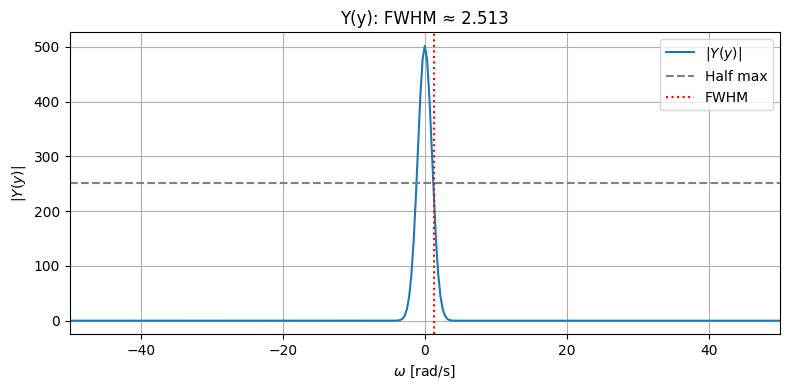

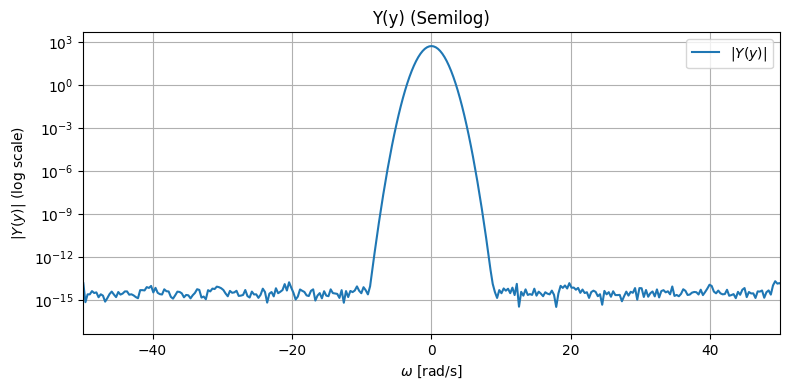

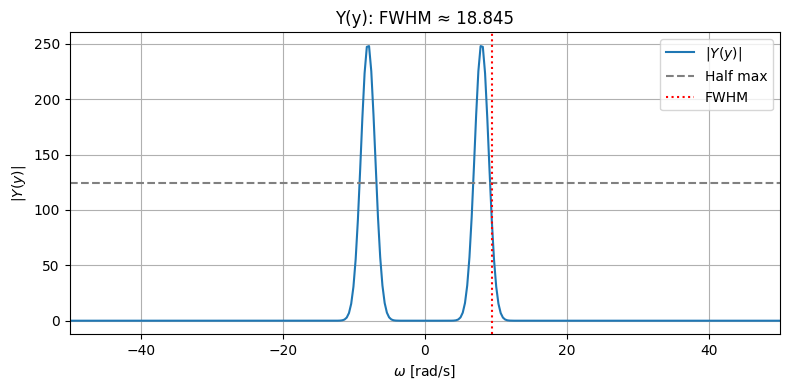

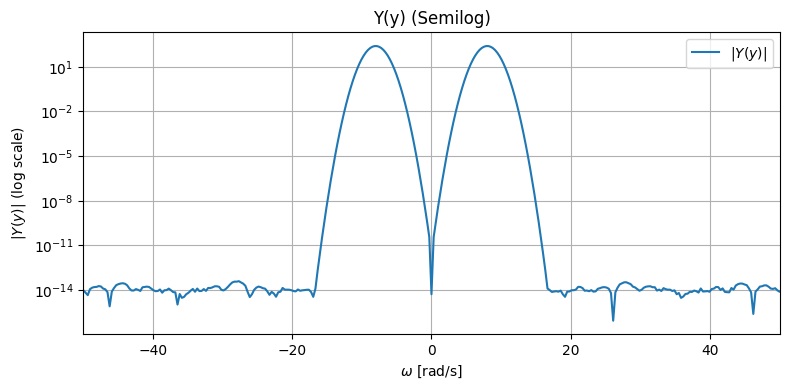

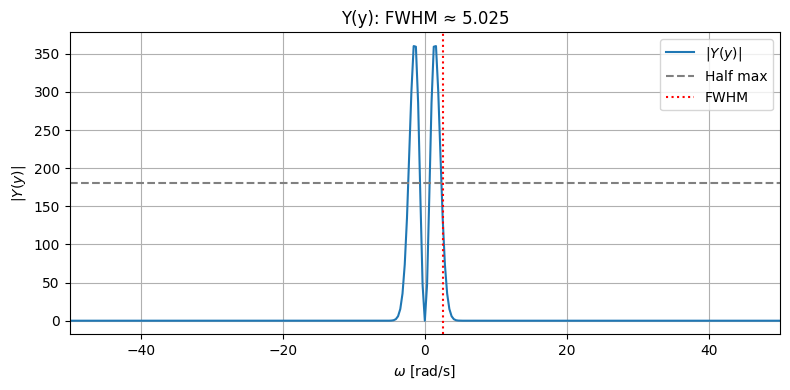

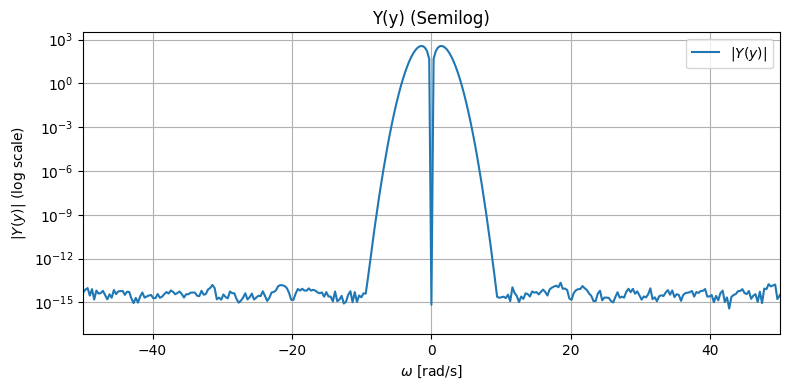

In [37]:
for label, y in signals:
    omega, Y = compute_fft(t, y)

    # Linear plot
    plot_signal(omega, Y, f'Y({label[0]})', show_fwhm=True, logscale=False, xlabel=r'$\omega$ [rad/s]')

    # Semilog plot
    plot_signal(omega, Y, f'Y({label[0]})', show_fwhm=False, logscale=True, xlabel=r'$\omega$ [rad/s]')


In [36]:
uncertainty_data = []

for label, y in signals:
    # Δt from time-domain 
    delta_t, _ = estimate_fwhm(t, y)

    # Δω from frequency-domain 
    omega, Y = compute_fft(t, y)
    delta_omega, _ = estimate_fwhm(omega, Y)

    # Uncertainty product and C estimate
    uncertainty_product = delta_t * delta_omega
    C = uncertainty_product / (2 * np.pi)

    uncertainty_data.append((label, delta_t, delta_omega, C))

    print(f"{label}:")
    print(f"  Δt  ≈ {delta_t:.5f} s")
    print(f"  Δω  ≈ {delta_omega:.5f} rad/s")
    print(f"  ΔtΔω ≈ {uncertainty_product:.5f}")
    print(f"  C    ≈ {C:.5f}")
    print()


y₁(t):
  Δt  ≈ 2.35559 s
  Δω  ≈ 2.51265 rad/s
  ΔtΔω ≈ 5.91876
  C    ≈ 0.94200

y₂(t):
  Δt  ≈ 2.10553 s
  Δω  ≈ 18.84484 rad/s
  ΔtΔω ≈ 39.67832
  C    ≈ 6.31500

y₃(t):
  Δt  ≈ 1.25531 s
  Δω  ≈ 5.02529 rad/s
  ΔtΔω ≈ 6.30832
  C    ≈ 1.00400



## Exercise 2 – Landau Section 10.4.2 #1: Wavelet Function Implementation

### 10.4.2 Continuous Wavelet Transforms

1) Examine the effect of using different mother wavelets. Accordingly, write a method that calculates the mother wavelet for:

a) a **Morlet wavelet** (Eq. 10.2),  
b) a **Mexican hat wavelet** (Eq. 10.3),  
c) a **Haar wavelet** (the square wave shown in Figure 10.2).


$$
\Psi(t) = e^{2\pi i t} e^{-\frac{t^2}{2\sigma^2}} = (\cos(2\pi t) + i \sin(2\pi t)) e^{-\frac{t^2}{2\sigma^2}} \tag{10.2}
$$

$$
\Psi(t) = -\sigma^2 \frac{d^2}{dt^2} e^{-\frac{t^2}{2\sigma^2}} = \left(1 - \frac{t^2}{\sigma^2}\right) e^{-\frac{t^2}{2\sigma^2}} \tag{10.3}
$$

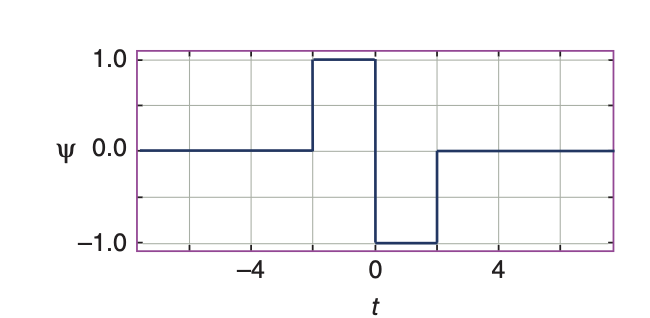

In [38]:
def morlet_wavelet(t, sigma=1.0):
    return np.exp(2j * np.pi * t) * np.exp(-t**2 / (2 * sigma**2))

def mexican_hat_wavelet(t, sigma=1.0):
    return (1 - (t**2 / sigma**2)) * np.exp(-t**2 / (2 * sigma**2))

def haar_wavelet(t):
    return np.where(
        (t >= -0.5) & (t < 0),
        1.0,
        np.where((t >= 0) & (t < 0.5), -1.0, 0.0)
    )


## Exercise 3 – Landau Section 10.4.2 #2: Wavelet transform

2) Try out your transform for the following input signals and see if the results make sense:

**a)** A pure sine wave: $
y(t) = \sin(2\pi t)
$

**b)** A sum of sine waves: $
y(t) = 2.5 \sin(2\pi t) + 6 \sin(4\pi t) + 10 \sin(6\pi t)
$

**c)** A non-stationary signal (Equation 10.23):

$$
y(t) =
\begin{cases}
\sin(2\pi t), & \text{for } 0 \leq t \leq 2 \\
5\sin(2\pi t) + 10\sin(4\pi t), & \text{for } 2 \leq t \leq 8 \\
2.5\sin(2\pi t) + 6\sin(4\pi t) + 10\sin(6\pi t), & \text{for } 8 \leq t \leq 12
\end{cases} \tag{10.23}
$$

**d)** The half-wave function (Equation 10.24):

$$
y(t) =
\begin{cases}
\sin(\omega t), & \text{for } 0 < t < T/2 \\
0, & \text{for } T/2 < t < T
\end{cases} \tag{10.24}
$$
